In [195]:
import pandas as pd
ipo_df = pd.read_csv("C:/Users/davir/Desktop/ipos_1521.csv")
precoipo = pd.read_csv("C:/Users/davir/Desktop/preco_ipo.csv")

In [196]:
tickers = ["PSVM11" , "WIZS3" ,  "AALR3" , "MOVI3" , "PARD3", "AZUL4", "CRFB3", "IRBR3", "OMGE3", "CAML3", 
                  "BKBR3", "BRDT3", "GNDI3", "HAPV3", "BIDI4", "SBFG3","NEOE3", "VIVA3", "BMGB4", "CEAB3", 
                  "MTRE3", "LWSA3", "MDNE3", "PRNR3", "ALPK3", "AMBP3", "SOMA3", "DMVF3", "LJQQ3", "LAVV3", 
                  "PGMN3", "PETZ3", "PLPL3", "MELK3", "HBSA3", "CURY3", "BOAS3", "SEQL3", "GMAT3", "TFCO4", 
                  "CASH3", "ENJU3", "AERI3", "RRRP3", "AVLL3", "RDOR3", "NGRD3"]
abertura = list(precoipo['preco'])
dict_tickers = dict(zip(tickers, abertura))

In [197]:
def rentability(ticker, dias_uteis, dict_ticker=dict_tickers, data=ipo_df):
    ticker = ticker.upper()
    df = data[data.codneg==ticker]
    df = df.reset_index(drop=True)
    variation = ((df["preult"].iloc[dias_uteis-1]/dict_ticker[ticker])-1)*100
    return variation

In [210]:
rent_df = pd.DataFrame(columns=["1D", "15D","1M", "3M", "5M"])
time = [1, 10, 20, 60, 90]
for t in tickers:
    rent_df.loc[t] = [rentability(t, c) for c in time]
        

In [211]:
rent_df.describe()

,1D,15D,1M,3M,5M
count,47.000000,47.000000,47.000000,47.000000,47.000000
mean,5.353000,5.580350,5.953911,16.030965,16.667813
std,12.847432,17.233128,27.865802,48.551964,44.654702
min,-27.586207,-27.764706,-42.736842,-69.473684,-62.315789
25%,-1.688805,-5.735294,-8.093333,-12.095238,-13.566138
50%,0.458333,5.526316,3.490909,8.678021,10.170213
75%,10.180755,15.492157,13.765226,31.072727,38.970607
max,52.702703,57.777778,153.555556,224.500000,146.935484


<AxesSubplot:>

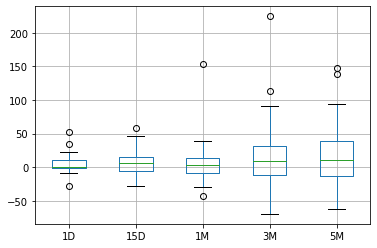

In [213]:
rent_df.boxplot(column=['1D', '15D', '1M', '3M', '5M'])